In [79]:
from scipy.stats import multivariate_normal
from pandas import read_csv, DataFrame
from matplotlib import pyplot

## Config Vars

In [80]:
conf_error_vects_path = 'data/error_vects.csv'
shifts = 5

## Load Dataset

In [81]:
error_vects_full = read_csv(conf_error_vects_path , header=0, index_col=0)

## Seperate data

In [83]:
train = error_vects_full.shape[0] * 1 // 2
    
error_vects = error_vects_full.iloc[:-train]

error_vects_test = error_vects_full.iloc[-train:]

In [84]:
error_vects.head()

,1,2,3,4,5,anomaly
40000,0.136215,0.083541,0.145496,0.085183,0.081741,0
40001,0.141272,0.090417,0.165775,0.078157,0.088608,0
40002,0.144212,0.077972,0.135333,0.078648,0.075410,0
40003,0.145004,0.084679,0.148652,0.074598,0.080191,0
40004,0.160781,0.095830,0.167924,0.080759,0.092752,0


## Calculate Means and covariance matrix of error vects

In [85]:
means = error_vects[error_vects.columns[:-1]].mean()
covariance = error_vects[error_vects.columns[:-1]].cov()

## Creating the Model

In [86]:
g_model = multivariate_normal(mean=means, cov=covariance)

In [87]:
error_val = DataFrame(columns = ['error'])
for row in range(error_vects_test.shape[0]):
    val = g_model.pdf(error_vects_test[error_vects_test.columns[:-1]].iloc[row])
    error_val.loc[row] = val
error_val.index = error_vects_test.index
error_val[["anomaly"]] = error_vects_test[["anomaly"]]

In [88]:
error_val_anomaly = error_val[error_val.anomaly == 1]
error_val_non_anomaly = error_val[error_val.anomaly == 0]

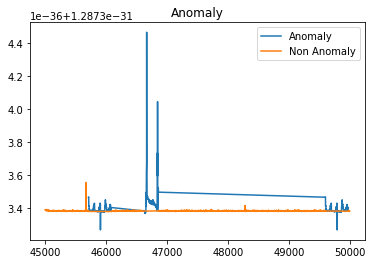

In [90]:
pyplot.figure()
pyplot.plot(error_val_anomaly['error'], label='Anomaly')
pyplot.plot(error_val_non_anomaly['error'], label='Non Anomaly')
pyplot.legend()
pyplot.title("Anomaly")
pyplot.show()